path=WindowsPath('c:/Users/Burai/OneDrive/Documents/GitHub/Brian-Gomez-Santiestevez-OPA23GB/ML_pt2_Labb2')


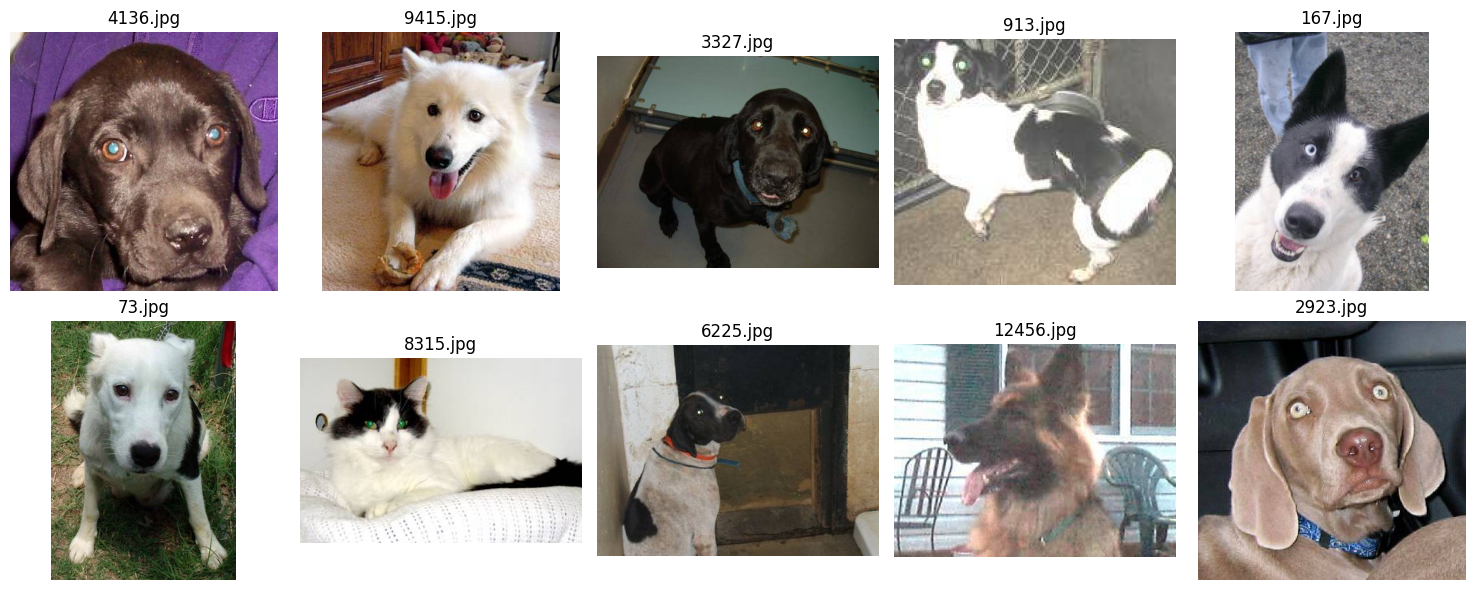

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random

# Set the path to the directory containing the image files
path = Path().absolute()
print(f"{path=}")

# Correctly set up the absolute path as a Path object
absolute_path = Path(r"c:/Users/Burai/OneDrive/Documents/GitHub/Brian-Gomez-Santiestevez-OPA23GB/ML_pt2_Labb2/original_data/test/test")

# List all .jpg image files in the directory
image_files = list(absolute_path.glob('*.jpg'))

# Check if there are enough files to sample from
if len(image_files) < 10:
    raise ValueError("Not enough image files to sample 10 items.")

# randomly select 10 image files
random_files = random.sample(image_files, 10)

# figure to display the images in a grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Adjust subplot grid as needed
axes = axes.flatten()

# Read and display each image file
for ax, file_path in zip(axes, random_files):
    # Read the image using OpenCV
    image = cv2.imread(str(file_path), cv2.IMREAD_UNCHANGED)
    # Convert BGR to RGB (OpenCV loads images in BGR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Display the image
    ax.imshow(image_rgb)
    ax.axis('off')  # Hide axes
    ax.set_title(file_path.name)  #set the file name as title

plt.tight_layout()
plt.show()


In [5]:
from pathlib import Path

def create_directory_structure(base_dir):
    # Define the base directory as a Path object
    base_path = Path(base_dir)
    
    # List of directories to create
    directories = [
        'experiment_small_data/test',
        'experiment_small_data/train',
        'experiment_small_data/val',
        'experiment_tiny_data/test',
        'experiment_tiny_data/train',
        'experiment_tiny_data/val',
        'original_data',
        'original_data/test',
        'original_data/train'
    ]
    
    # Loop through the directories list and create each one
    for directory in directories:
        (base_path / directory).mkdir(parents=True, exist_ok=True)



# Set the base directory to the current directory where this script runs
base_dir = '.'
create_directory_structure(base_dir)

print("Directory structure created successfully!")


Directory structure created successfully!


In [1]:
import shutil
from pathlib import Path
import random

# Define the base directory and the source directory

def distribute_files_equally(base_dir, source_dir, experiments):
    patterns = {
        'dogs': 'dog.*.jpg',
        'cats': 'cat.*.jpg'
    }
    
    # Initialize dictionaries to store images
    images = { 'dogs': [], 'cats': [] }

    # Populate dictionaries by filtering with patterns and ensuring 1250 files each
    for file in source_dir.glob('*.jpg'):
        if 'dog' in file.name and len(images['dogs']) < 1250:
            images['dogs'].append(file)
        elif 'cat' in file.name and len(images['cats']) < 1250:
            images['cats'].append(file)
    
    # Check if we have enough images
    if len(images['dogs']) < 1250 or len(images['cats']) < 1250:
        print(f"Not enough images: Found {len(images['dogs'])} dogs and {len(images['cats'])} cats.")
        return
    
    # Handle the distribution for each experiment
    for experiment, splits in experiments.items():
        for category, img_list in images.items():
            random.shuffle(img_list)

            # Calculate the number of files for each subset based on the specifications
            num_train = splits['train']
            num_val = splits['val']
            num_test = splits['test']

            # Split images into train, val, and test
            train_images = img_list[:num_train]
            val_images = img_list[num_train:num_train + num_val]
            test_images = img_list[num_train + num_val:num_train + num_val + num_test]

            # Copy files to their new destinations
            for img_list, split in zip([train_images, val_images, test_images], ['train', 'val', 'test']):
                target_path = base_dir / experiment / split / category
                target_path.mkdir(parents=True, exist_ok=True)  # Ensure target directory exists
                for image in img_list:
                    shutil.copy(str(image), target_path)

# Define the base directory and the source directory
base_dir = Path('C:/Users/Burai/OneDrive/Documents/GitHub/Brian-Gomez-Santiestevez-OPA23GB/ML_pt2_Labb2')
source_dir = base_dir / 'original_data/train/train'  # Updated path to the combined directory

# Define the experiments and the number of images per category for each split
experiments = {
    'experiment_small': {'train': 800, 'val': 200, 'test': 250}, # Each number is per category
    'experiment_tiny': {'train': 80, 'val': 20, 'test': 25}      # Each number is per category
}

# Distribute files according to the defined splits
distribute_files_equally(base_dir, source_dir, experiments)

print("Files have been distributed according to the defined splits.")



Files have been distributed according to the defined splits.


Split data into experiment_small_data folder

NameError: name 'paths' is not defined

NameError: name 'images' is not defined

NameError: name 'widths' is not defined

## pick size to use

large size
- a lot of details
- risk for overfitting
- computationally costly


small size
- cheaper computation
- less details


something to onside
- don't go outside of the range of your distribution
- ex  (150, 150), (180, 200), (120, 120) utgångspunkt
- size by itself is a hyperparameter






In [11]:
#Proto-Code

image_resize = np.array([cv2.resize(image, widths, heights) for image in images])

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - dst is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'dst'
